In [5]:
!pip install scikit-learn

### Regresja:
1. [Import bibliotek](#0)
2. [Przygotowanie danych](#1)
3. [Równanie normalne](#2)

### <a name='0'></a> Import bibliotek

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import sklearn

sklearn.__version__

'1.5.1'

### <a name='1'></a> Przygotowanie danych

In [7]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])

m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [8]:
X1 = X1.reshape(m, 1)
Y = Y.reshape(-1, 1)

print(X1)
print(X1.shape)
print(Y)
print(Y.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)
[[3000]
 [3250]
 [3500]
 [3750]
 [4000]
 [4250]]
(6, 1)


In [9]:
bias = np.ones((m, 1))
print(bias)
print(bias.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [10]:
X = np.append(bias, X1, axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


### <a name='2'></a> Równienie normalne

In [11]:
np.dot(X.T, X)

array([[ 6., 21.],
       [21., 91.]])

In [12]:
L = np.linalg.inv(np.dot(X.T, X))
L

array([[ 0.86666667, -0.2       ],
       [-0.2       ,  0.05714286]])

In [13]:
P = np.dot(X.T, Y)
P

array([[21750.],
       [80500.]])

In [14]:
np.dot(L, P)

array([[2750.],
       [ 250.]])

Podstać końcowa modelu:
Y = 2750 + 250X1

###Regresja liniowa przy pomocy scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X1, Y)


print(regression.intercept_)
print(regression.coef_[0])

[2750.]
[250.]


###Metoda spadku wzdluz gradientu (Metoda gradientu prostego)

###1. Losowa inicjalizacja parametrow

In [16]:
#Wskaznik uczenia, learning rate
#Koniecznie nalezy testowac rozne wartosci czynnikow uczenia
eta = 0.01

weights = np.random.rand(2, 1)
print(X)
print(weights)

#wo, w1

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
[[0.49064957]
 [0.92971235]]


###2. Metoda gradientu prostego

In [17]:
intercept = []
# intercept - w0
coef = []
#coef - w1


for i in range(3000):

  gradient = (2 / m) * X.T.dot(X.dot(weights) - Y)
  weights = weights - eta * gradient
  intercept.append(weights[0][0])
  coef.append(weights[1][0])

print(weights)

[[2749.95600472]
 [ 250.01027639]]


In [18]:
df = pd.DataFrame(data={'intercept': intercept, 'coef': coef})
df.head()

,intercept,coef
0,72.915757,268.946687
1,125.131173,450.595423
2,163.586870,573.488962
3,192.670906,656.412896
4,215.368585,712.147354


###Wizualizacja dopasowania

In [19]:
px.line(df, y='intercept', width=800, title='Dopasownaie: intercept')

In [20]:
px.line(df, y='coef', width=800, title='Dopasownaie: coef')


###2. Budowanie modelu regresji liniowej:

4. [Import bibliotek](#3)
5. [Wygenerowanie danych](#4)
6. [Regresja Liniowa przy uzyciu scikit-learn](#5)
7. [Wizualizacjia graficzna modelu](#6)
8. [Wspolczynnik R2](#7)
9. [Koncowa postac modelu](#8)
10. [Regresja z podzialem na zbior treningowy oraz testowy](#9)
11. [Regresja liniowa - zbior treningowy - wizualizacja](#10)
12. [Regresja liniowa - zbior testowy- wizualizacja](#11)
13. [Predykcja na podstawie modelu](#12)


In [21]:
!pip install scikit-learn

In [22]:
!pip install --upgrade scikit-learn

### <a name='3'></a> Import bibliotek


In [23]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120,
                    formatter=dict(float=lambda x: f'{x:.2f}'))

sns.set(font_scale=1.3)
sklearn.__version__

'1.5.1'

### <a name='4'></a> Wygenerowanie danych

In [24]:
from sklearn.datasets import make_regression

data, target = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')


ImportError: cannot import name 'validate_data' from 'sklearn.utils.validation' (c:\Users\szymo\anaconda3\Lib\site-packages\sklearn\utils\validation.py)

In [ ]:
data[:5]

array([[0.93],
       [0.09],
       [-1.06],
       [0.31],
       [-0.48]])

In [ ]:
target[:5]

array([74.59, -37.46, -16.46, 5.35, -13.21])

[]

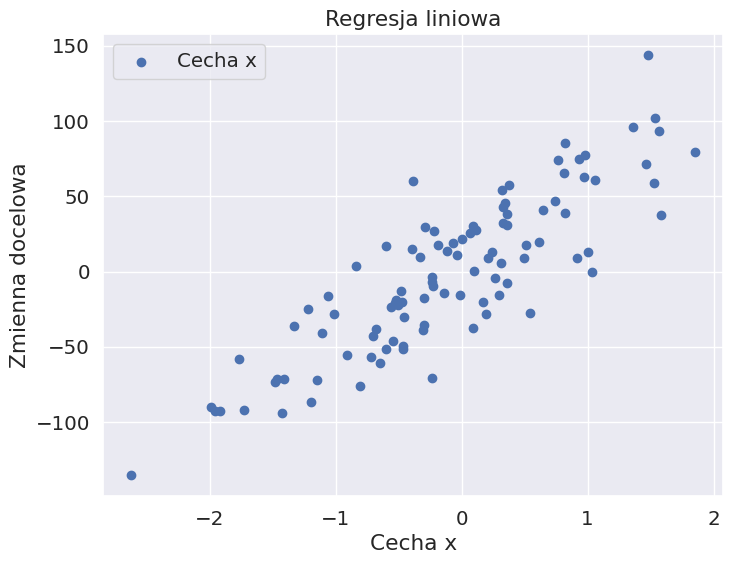

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(data, target, label='Cecha x')
plt.legend()
plt.plot()

### <a name='5'></a> Regresja liniowa przy uzyciu scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#metoda fit() dopasowuje model liniowy do danych
#Metoda fit -> trenowanie modelu

regressor.fit(data, target)

LinearRegression()

In [ ]:
# Metoda score() dokonuje oceny modelu na przekazaych dancyh (wynik R2 score)

regressor.score(data, target)

0.7426670084336404

In [ ]:
# Metoda predict() dokonuje predycji na podstawie modelu
# y_pred zwraca nam predycje
y_pred = regressor.predict(data)
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

### <a name='6'></a> Wizualizacja graficzna modelu

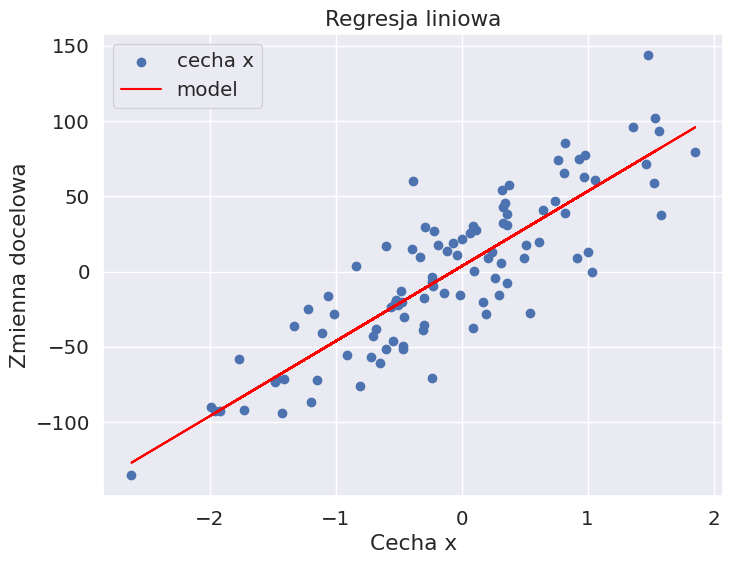

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, y_pred, color='red', label='model')
plt.legend()
plt.show()

### <a name='7'></a> Wspolczynnik R2

Wspolczynnik R2 jest zdefiniowany jako 1 - u/v,

gdzie u jest okreslone wzorem    ((y_true - y_pred) ** 2).sum()

oraz v jako ((y_true - y_true.mean()) ** 2).sum()

1 - (((y_true - y_pred) ** 2).sum() / ((y_true - y_true.mean()) ** 2).sum())

Najlepsza mozliwa wartoscia jest 1.0. R2 moze przyjmowac wartosc ujemna. Model, ktory przewiduje zawsze dla kazdej probki wartosc oczekiwana zmiennej docelowej ma wspolczynnik R2 rowne 0

In [ ]:
regressor.score(data, target)

0.7426670084336404

In [ ]:
#list comprehention

[item for item in dir(regressor) if not item.startswith('_')]

['coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_fit_request',
 'set_params',
 'set_score_request',
 'singular_']

In [ ]:
regressor.coef_

array([49.83])

In [ ]:
regressor.intercept_

3.4953459615809184

### <a name='8'></a> Koncowa postac modelu

Y = w0 + w1 * X1

Y = 3.49 + 49.83 * X1

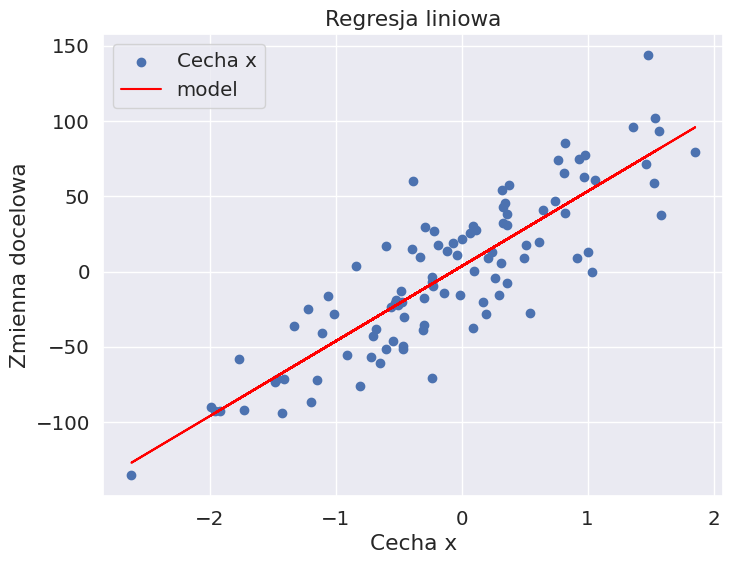

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(data, target, label='Cecha x')
plt.plot(data, regressor.intercept_ + regressor.coef_[0] * data, color='red', label='model')
plt.legend()
plt.show()

### <a name='9'></a> Regresja z podzialem na zbior treningowy oraz testowy

In [ ]:
data, target = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15.0, random_state=42)

print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (1000, 1)
target shape: (1000,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
X_test shape: (250, 1)
y_train shape: (750,)
y_test shape: (250,)


[]

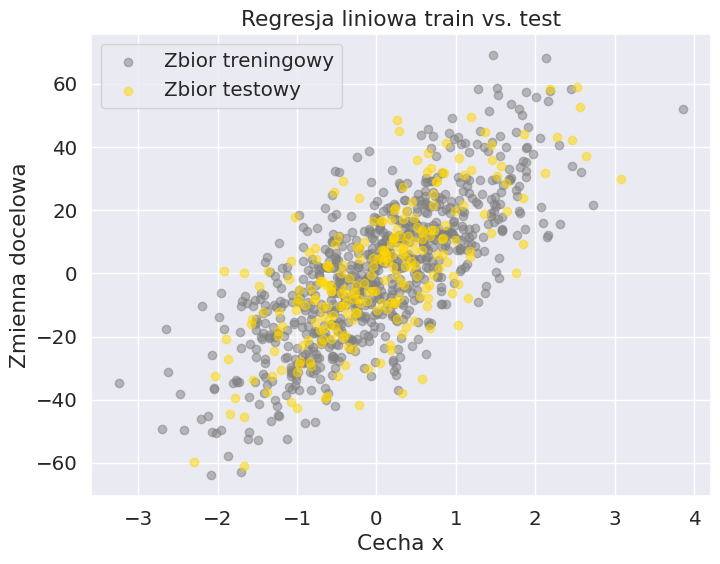

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa train vs. test')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X_train, y_train, label='Zbior treningowy', color='gray', alpha=0.5)
plt.scatter(X_test, y_test, label='Zbior testowy', color='gold', alpha=0.5)
plt.legend()
plt.plot()

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Dopasowujemy model tylko do dancyh treningowych

LinearRegression()

In [ ]:
#Oceniamy model na dancyh treningowych
regressor.score(X_train, y_train)

0.5577821608014861

In [ ]:
#Oceniamy model na dancyh testowych
regressor.score(X_test, y_test)

0.5000878630630643

### <a name='10'></a> Regresja liniowa - zbior treningowy - wizualizacja




[]

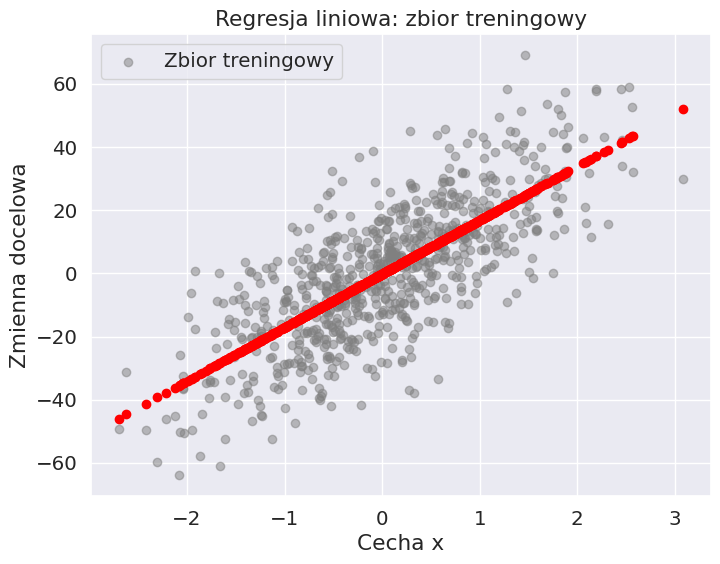

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior treningowy')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X_train, y_train, label='Zbior treningowy', color='gray', alpha=0.5 )
plt.scatter(X_train, regressor.intercept_ + regressor.coef_[0] * X_train, color='red')
plt.legend()
plt.plot()

### <a name='11'></a> Regresja liniowa - zbior testowy - wizualizacja

[]

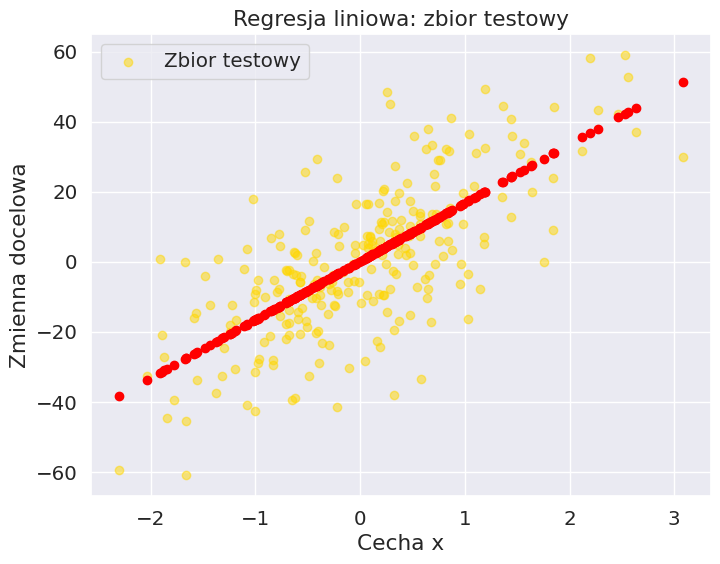

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa: zbior testowy')
plt.xlabel('Cecha x')
plt.ylabel('Zmienna docelowa')
plt.scatter(X_test, y_test, label='Zbior testowy', color='gold', alpha=0.5 )
plt.scatter(X_test, regressor.intercept_ + regressor.coef_[0] * X_test, color='red')
plt.legend()
plt.plot()

### <a name='11'></a> Predykcja na podstawie modelu

In [ ]:
y_pred = regressor.predict(X_test)

predictions = pd.DataFrame(data={'y_true': y_test, 'y_pred': y_pred})
predictions.head()

,y_true,y_pred
0,-15.056062,8.037617
1,-9.916063,-14.941453
2,41.112321,14.636680
3,2.395382,-10.253163
4,-5.112969,-13.546947


In [ ]:
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()

,y_true,y_pred,error
0,-15.056062,8.037617,-23.093679
1,-9.916063,-14.941453,5.025390
2,41.112321,14.636680,26.475640
3,2.395382,-10.253163,12.648544
4,-5.112969,-13.546947,8.433977


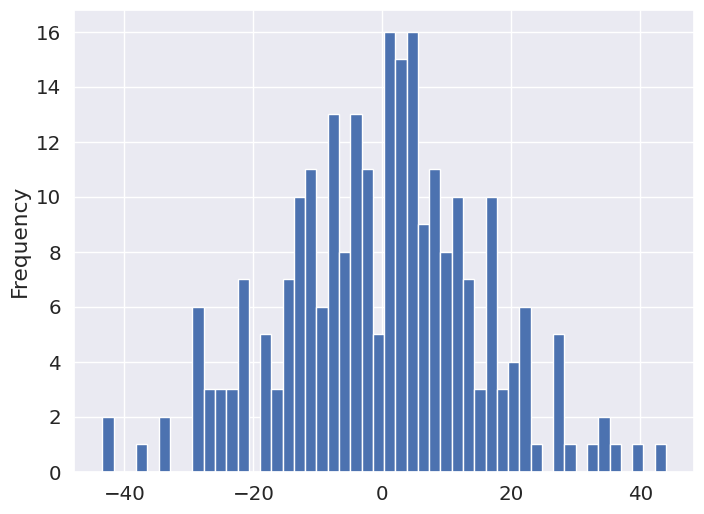

In [ ]:
_ = predictions['error'].plot(kind='hist', bins=50, figsize=(8, 6))